In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

In [3]:
def analysis(labels, predications):
    print('Classifacion Report: \n', classification_report(labels,predications, target_names = ['Positive','Negative']))
    print("Accuracy:\n", accuracy_score(labels, predications))
    cm_train = confusion_matrix(labels, predications)
    print('Confusion Matrix: \n', seaborn.heatmap(cm_train,annot=True,fmt="d"))

In [3]:
df = pd.read_csv(r'dataset.csv')
display(df)

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",negative
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative
4,Some critics have compared Chop Shop with the ...,positive
...,...,...
44995,I appreciate movies like this: smart and well-...,positive
44996,It's rare that I sit down in front of the TV s...,positive
44997,I was bored one night and Red Eye was on and t...,positive
44998,"""Three"" is a seriously dumb shipwreck movie. M...",negative


In [4]:
df['sentiment'] = df['sentiment'].replace('negative',0)
df['sentiment'] = df['sentiment'].replace('positive',1)
display(df)
print(df['sentiment'].value_counts())

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",0
1,If you're a layman interested in quantum theor...,0
2,It's amazing that this no talent actor Chapa g...,0
3,This must be one of the most overrated Spanish...,0
4,Some critics have compared Chop Shop with the ...,1
...,...,...
44995,I appreciate movies like this: smart and well-...,1
44996,It's rare that I sit down in front of the TV s...,1
44997,I was bored one night and Red Eye was on and t...,1
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0


sentiment
1    22501
0    22499
Name: count, dtype: int64


### 3.1.1 (without preprocessing)

In [235]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['comment'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, shuffle= True)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.89      0.89      4586
    Negative       0.89      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8884444444444445
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


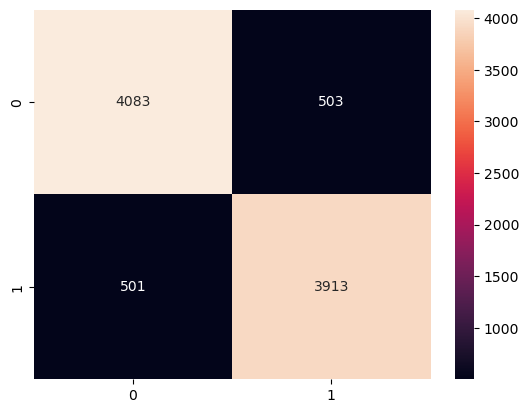

In [236]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.69      0.56      0.62      4586
    Negative       0.62      0.74      0.67      4414

    accuracy                           0.65      9000
   macro avg       0.65      0.65      0.65      9000
weighted avg       0.65      0.65      0.65      9000

Accuracy:
 0.6481111111111111
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


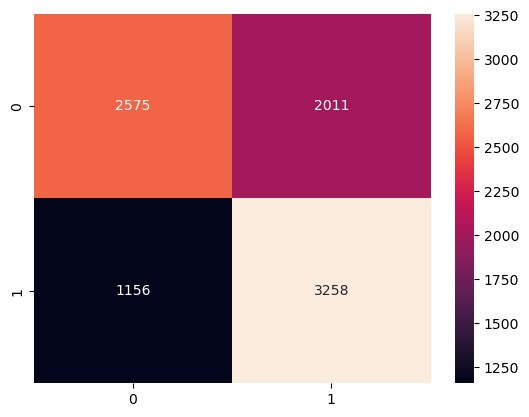

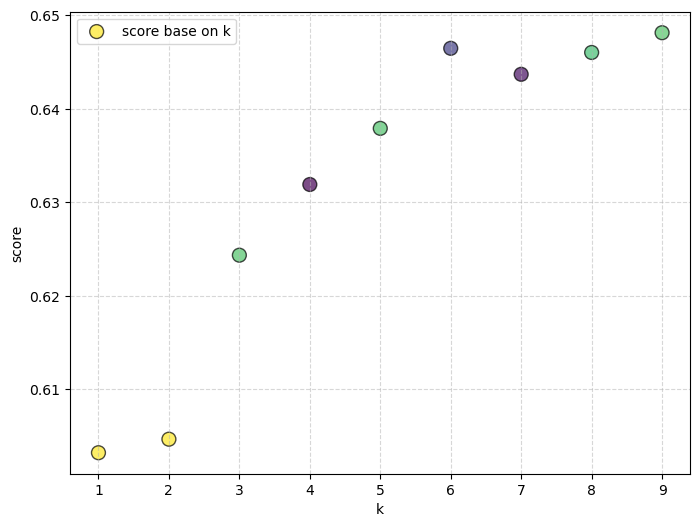

In [246]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)
colors = np.random.rand(len(scores)) 
plt.figure(figsize=(8, 6))
plt.scatter(k_range, scores, c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1.0, label='score base on k')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [254]:
print('best k is :', best_k)

best k is : 9


### 3.1.2 (initial preprocessing)

In [20]:
df = pd.read_csv(r'dataset.csv')
df['sentiment'] = df['sentiment'].replace('negative',0)
df['sentiment'] = df['sentiment'].replace('positive',1)

#### all together

In [21]:
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    text = re.sub("[^a-zA-Z']", ' ', text) 
    text = re.sub("\s+", " ", text).strip()
    text = str(text).lower()
    token = word_tokenize(text)
    return token 
df['comment'] = df['comment'].apply(preprocess_text)
display(df)


,comment,sentiment
0,"[oh, my, god, it, just, does, n't, get, any, w...",0
1,"[if, you, 're, a, layman, interested, in, quan...",0
2,"[it, 's, amazing, that, this, no, talent, acto...",0
3,"[this, must, be, one, of, the, most, overrated...",0
4,"[some, critics, have, compared, chop, shop, wi...",1
...,...,...
44995,"[i, appreciate, movies, like, this, smart, and...",1
44996,"[it, 's, rare, that, i, sit, down, in, front, ...",1
44997,"[i, was, bored, one, night, and, red, eye, was...",1
44998,"[three, is, a, seriously, dumb, shipwreck, mov...",0


In [22]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['comment'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,306484
1,and,159020
2,a,147659
3,of,136659
4,to,118117
5,is,102810
6,in,89238
7,br,88202
8,it,85658
9,i,73973


In [23]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['comment'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,293970
1,a,143008
2,and,132932
3,of,123719
4,to,123172
5,br,93658
6,is,92876
7,it,86392
8,i,84136
9,in,78829


In [24]:
def preprocess_text(text):
    sent = ' '.join(text)
    return sent 
df['comment'] = df['comment'].apply(preprocess_text)
display (df)

,comment,sentiment
0,oh my god it just does n't get any worse than ...,0
1,if you 're a layman interested in quantum theo...,0
2,it 's amazing that this no talent actor chapa ...,0
3,this must be one of the most overrated spanish...,0
4,some critics have compared chop shop with the ...,1
...,...,...
44995,i appreciate movies like this smart and well c...,1
44996,it 's rare that i sit down in front of the tv ...,1
44997,i was bored one night and red eye was on and t...,1
44998,three is a seriously dumb shipwreck movie masq...,0


In [25]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['comment'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.89      0.89      4586
    Negative       0.88      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8887777777777778
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


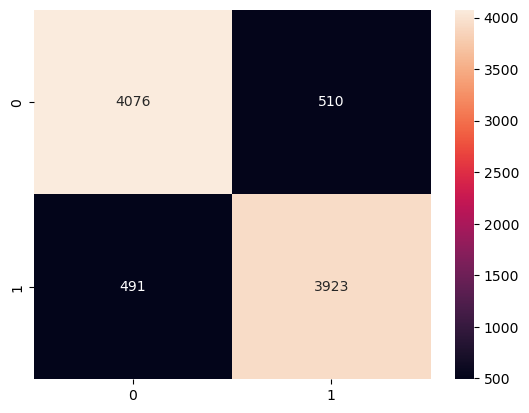

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.69      0.57      0.63      4586
    Negative       0.62      0.74      0.67      4414

    accuracy                           0.65      9000
   macro avg       0.66      0.65      0.65      9000
weighted avg       0.66      0.65      0.65      9000

Accuracy:
 0.6521111111111111
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


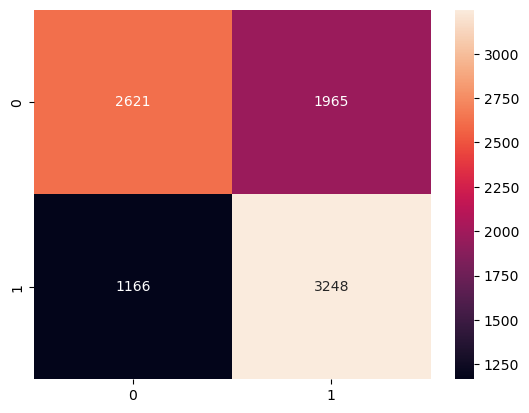

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

####  checking effects

In [7]:
df = pd.read_csv(r'dataset.csv')
df['sentiment'] = df['sentiment'].replace('negative',0)
df['sentiment'] = df['sentiment'].replace('positive',1)

In [8]:
def preprocess_text(text):
    text = re.sub("[^a-zA-Z']", ' ', text) 
    text = re.sub("\s+", " ", text).strip()
    return text 
df['f1_remove_nums_charac'] = df['comment'].apply(preprocess_text)
def preprocess_text(text):
    text = str(text).lower()
    return text 
df['f2_lower_text'] = df['comment'].apply(preprocess_text)
def preprocess_text(text):
    text = word_tokenize(text)
    return text 
df['f3_tokenize'] = df['comment'].apply(preprocess_text)
display (df)

,comment,sentiment,f1_remove_nums_charac,f2_lower_text,f3_tokenize
0,"Oh my god, it just doesn't get any worse than ...",0,Oh my god it just doesn't get any worse than t...,"oh my god, it just doesn't get any worse than ...","[Oh, my, god, ,, it, just, does, n't, get, any..."
1,If you're a layman interested in quantum theor...,0,If you're a layman interested in quantum theor...,if you're a layman interested in quantum theor...,"[If, you, 're, a, layman, interested, in, quan..."
2,It's amazing that this no talent actor Chapa g...,0,It's amazing that this no talent actor Chapa g...,it's amazing that this no talent actor chapa g...,"[It, 's, amazing, that, this, no, talent, acto..."
3,This must be one of the most overrated Spanish...,0,This must be one of the most overrated Spanish...,this must be one of the most overrated spanish...,"[This, must, be, one, of, the, most, overrated..."
4,Some critics have compared Chop Shop with the ...,1,Some critics have compared Chop Shop with the ...,some critics have compared chop shop with the ...,"[Some, critics, have, compared, Chop, Shop, wi..."
...,...,...,...,...,...
44995,I appreciate movies like this: smart and well-...,1,I appreciate movies like this smart and well c...,i appreciate movies like this: smart and well-...,"[I, appreciate, movies, like, this, :, smart, ..."
44996,It's rare that I sit down in front of the TV s...,1,It's rare that I sit down in front of the TV s...,it's rare that i sit down in front of the tv s...,"[It, 's, rare, that, I, sit, down, in, front, ..."
44997,I was bored one night and Red Eye was on and t...,1,I was bored one night and Red Eye was on and t...,i was bored one night and red eye was on and t...,"[I, was, bored, one, night, and, Red, Eye, was..."
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0,Three is a seriously dumb shipwreck movie Masq...,"""three"" is a seriously dumb shipwreck movie. m...","[``, Three, '', is, a, seriously, dumb, shipwr..."


##### effect of f1_remove_nums_charac

In [9]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['f1_remove_nums_charac'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.89      0.89      4586
    Negative       0.88      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8877777777777778
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


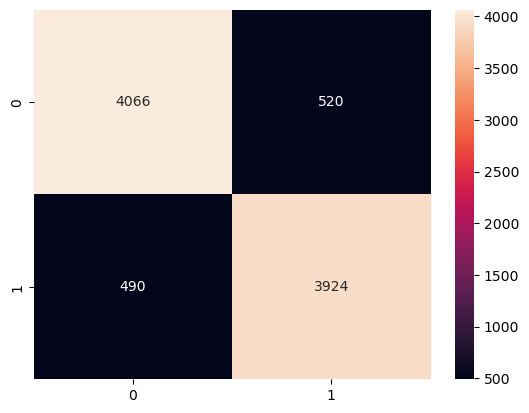

In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.69      0.56      0.62      4586
    Negative       0.62      0.74      0.67      4414

    accuracy                           0.65      9000
   macro avg       0.65      0.65      0.65      9000
weighted avg       0.65      0.65      0.64      9000

Accuracy:
 0.6473333333333333
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


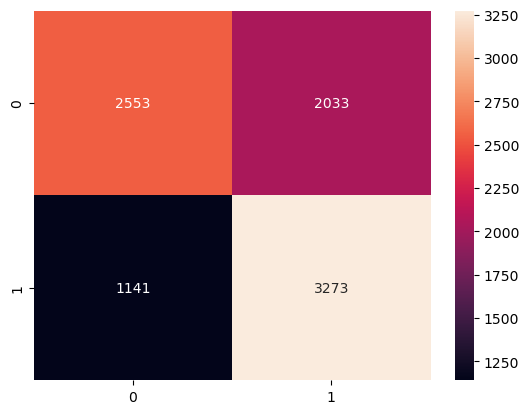

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

##### effect of f2_lower_text

In [12]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['f2_lower_text'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.89      0.89      4586
    Negative       0.89      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8884444444444445
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


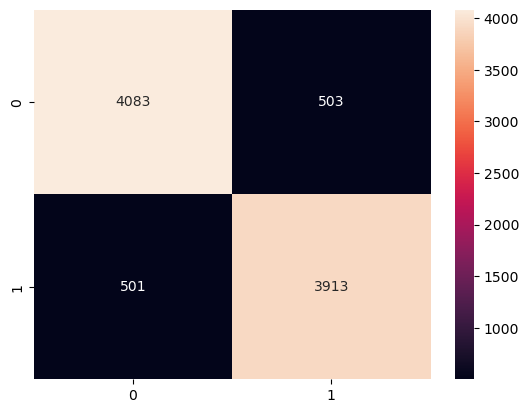

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.69      0.56      0.62      4586
    Negative       0.62      0.74      0.67      4414

    accuracy                           0.65      9000
   macro avg       0.65      0.65      0.65      9000
weighted avg       0.65      0.65      0.65      9000

Accuracy:
 0.6481111111111111
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


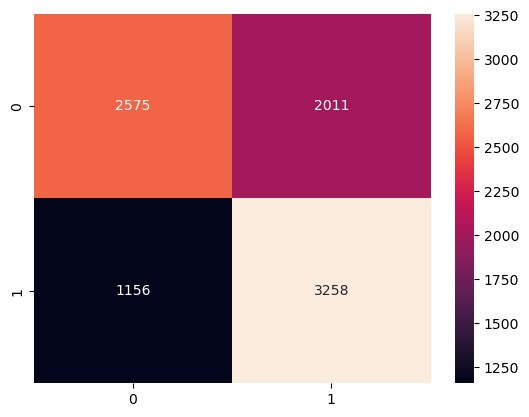

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

##### effect of f3_tokenize

In [15]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['f3_tokenize'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,264724
1,",",253641
2,.,209436
3,and,152681
4,a,140942
5,of,134641
6,to,116286
7,is,101769
8,/,88402
9,>,88317


In [16]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['f3_tokenize'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,251460
1,",",236623
2,.,212261
3,a,137216
4,and,125522
5,of,121877
6,to,120985
7,/,93898
8,>,93823
9,<,93752


In [17]:
def preprocess_text(text):
    sent = ' '.join(text)
    return sent 
df['f3_tokenize'] = df['f3_tokenize'].apply(preprocess_text)
display (df)

,comment,sentiment,f1_remove_nums_charac,f2_lower_text,f3_tokenize
0,"Oh my god, it just doesn't get any worse than ...",0,Oh my god it just doesn't get any worse than t...,"oh my god, it just doesn't get any worse than ...","Oh my god , it just does n't get any worse tha..."
1,If you're a layman interested in quantum theor...,0,If you're a layman interested in quantum theor...,if you're a layman interested in quantum theor...,If you 're a layman interested in quantum theo...
2,It's amazing that this no talent actor Chapa g...,0,It's amazing that this no talent actor Chapa g...,it's amazing that this no talent actor chapa g...,It 's amazing that this no talent actor Chapa ...
3,This must be one of the most overrated Spanish...,0,This must be one of the most overrated Spanish...,this must be one of the most overrated spanish...,This must be one of the most overrated Spanish...
4,Some critics have compared Chop Shop with the ...,1,Some critics have compared Chop Shop with the ...,some critics have compared chop shop with the ...,Some critics have compared Chop Shop with the ...
...,...,...,...,...,...
44995,I appreciate movies like this: smart and well-...,1,I appreciate movies like this smart and well c...,i appreciate movies like this: smart and well-...,I appreciate movies like this : smart and well...
44996,It's rare that I sit down in front of the TV s...,1,It's rare that I sit down in front of the TV s...,it's rare that i sit down in front of the tv s...,It 's rare that I sit down in front of the TV ...
44997,I was bored one night and Red Eye was on and t...,1,I was bored one night and Red Eye was on and t...,i was bored one night and red eye was on and t...,I was bored one night and Red Eye was on and t...
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0,Three is a seriously dumb shipwreck movie Masq...,"""three"" is a seriously dumb shipwreck movie. m...",`` Three '' is a seriously dumb shipwreck movi...


In [18]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['f3_tokenize'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.89      0.89      4586
    Negative       0.88      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8872222222222222
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


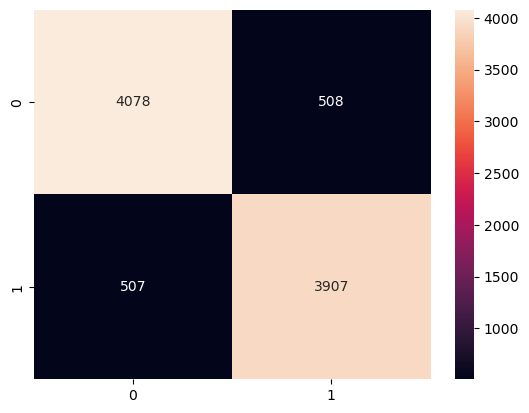

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.69      0.57      0.63      4586
    Negative       0.62      0.73      0.67      4414

    accuracy                           0.65      9000
   macro avg       0.66      0.65      0.65      9000
weighted avg       0.66      0.65      0.65      9000

Accuracy:
 0.6505555555555556
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


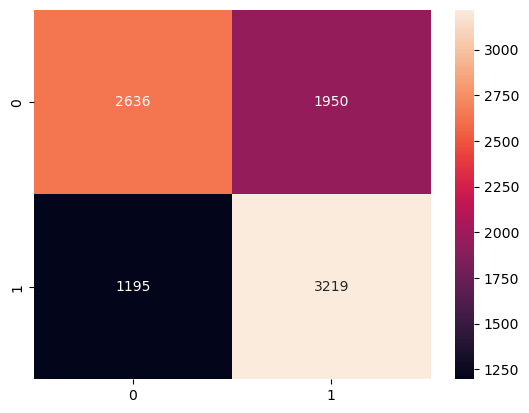

In [20]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

##### Feature extraction from other 3 features

In [21]:
def remove_duplicates(s):
    parts = s.split(' ')  
    unique_parts = []
    for part in parts:
        if part not in unique_parts:
            unique_parts.append(part)
    return ' '.join(unique_parts)
df['combined'] = df.apply(lambda x: ' '.join(x.astype(str)), axis=1)
df['combined'] = df['combined'].apply(remove_duplicates)
df = df[['combined','sentiment']]
display(df)

,combined,sentiment
0,"Oh my god, it just doesn't get any worse than ...",0
1,If you're a layman interested in quantum theor...,0
2,It's amazing that this no talent actor Chapa g...,0
3,This must be one of the most overrated Spanish...,0
4,Some critics have compared Chop Shop with the ...,1
...,...,...
44995,I appreciate movies like this: smart and well-...,1
44996,It's rare that I sit down in front of the TV s...,1
44997,I was bored one night and Red Eye on thought w...,1
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [22]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['combined'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.88      0.88      0.88      4586
    Negative       0.88      0.88      0.88      4414

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000

Accuracy:
 0.8813333333333333
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


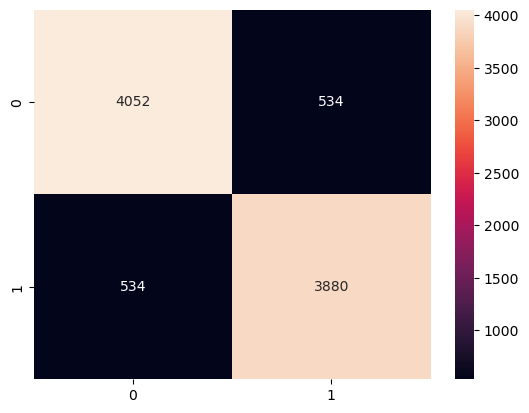

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.70      0.41      0.52      4586
    Negative       0.57      0.82      0.67      4414

    accuracy                           0.61      9000
   macro avg       0.64      0.62      0.60      9000
weighted avg       0.64      0.61      0.59      9000

Accuracy:
 0.6112222222222222
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


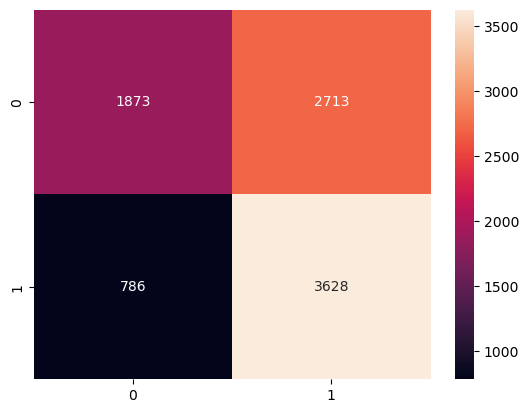

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

### 3.1.3 (Complete preprocessing)

#### Make features

In [3]:
df = pd.read_csv(r'dataset.csv')
df['sentiment'] = df['sentiment'].replace('negative',0)
df['sentiment'] = df['sentiment'].replace('positive',1)

In [4]:
import re             ####### detect loooove to love repeat detection
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp=re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl=r'\1\2\3'
    def replace(self,word):
        if(wordnet.synsets(word)):
            return word
        repl_word=self.repeat_regexp.sub(self.repl,word)
        if(repl_word!=word):
            return self.replace(repl_word)
        else:
            return repl_word
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
replacer=RepeatReplacer()

In [5]:

def preprocess_text(text):
    text = re.sub("[^a-zA-Z']", ' ', text) 
    text = re.sub("\s+", " ", text).strip()
    text = str(text).lower()
    text = word_tokenize(text)
    text = [replacer.replace(w) for w in text]
    text = [w for w in text if w not in stopwords.words("english")]    # Removing stop words
    return text 
df['stop_words'] = df['comment'].apply(preprocess_text)

def preprocess_text(text):
    text = [lemmatizer.lemmatize(word=w,pos='v') for w in text]     # Lemmatication
    return text 
df['Lemmatication'] = df['stop_words'].apply(preprocess_text)

def preprocess_text(text):
    text = [stemmer.stem(w) for w in text]     # stemming
    return text 
df['stemming'] = df['stop_words'].apply(preprocess_text)

def preprocess_text(text):
    text = [i for i in text if len(i)>2]               # Remove words have 2 alphabet
    return text 
df['com_have_2_alphabetment'] = df['stemming'].apply(preprocess_text)

In [6]:
import shelve
with shelve.open('features.db') as db:
    db['f1'] = df[['stop_words','comment','sentiment']]
    db['f2'] = df[['Lemmatication','comment','sentiment']]
    db['f3'] = df[['stemming','comment','sentiment']]
    db['f4'] = df[['com_have_2_alphabetment','comment','sentiment']]

In [7]:
display(df)

,comment,sentiment,stop_words,Lemmatication,stemming,com_have_2_alphabetment
0,"Oh my god, it just doesn't get any worse than ...",0,"[oh, god, n't, get, worse, always, love, silly...","[oh, god, n't, get, worse, always, love, silly...","[oh, god, n't, get, wors, alway, love, silli, ...","[god, n't, get, wors, alway, love, silli, litt..."
1,If you're a layman interested in quantum theor...,0,"['re, layman, interested, quantum, theory, str...","['re, layman, interest, quantum, theory, strin...","['re, layman, interest, quantum, theori, strin...","['re, layman, interest, quantum, theori, strin..."
2,It's amazing that this no talent actor Chapa g...,0,"['s, amazing, talent, actor, chapa, got, well,...","['s, amaze, talent, actor, chapa, get, well, k...","['s, amaz, talent, actor, chapa, got, well, kn...","[amaz, talent, actor, chapa, got, well, known,..."
3,This must be one of the most overrated Spanish...,0,"[must, one, overrated, spanish, films, history...","[must, one, overrate, spanish, film, history, ...","[must, one, overr, spanish, film, histori, lac...","[must, one, overr, spanish, film, histori, lac..."
4,Some critics have compared Chop Shop with the ...,1,"[critics, compared, chop, shop, theatrical, re...","[critics, compare, chop, shop, theatrical, rel...","[critic, compar, chop, shop, theatric, releas,...","[critic, compar, chop, shop, theatric, releas,..."
...,...,...,...,...,...,...
44995,I appreciate movies like this: smart and well-...,1,"[appreciate, movies, like, smart, well, crafte...","[appreciate, movies, like, smart, well, craft,...","[appreci, movi, like, smart, well, craft, ente...","[appreci, movi, like, smart, well, craft, ente..."
44996,It's rare that I sit down in front of the TV s...,1,"['s, rare, sit, front, tv, specifically, watch...","['s, rare, sit, front, tv, specifically, watch...","['s, rare, sit, front, tv, specif, watch, part...","[rare, sit, front, specif, watch, particular, ..."
44997,I was bored one night and Red Eye was on and t...,1,"[bored, one, night, red, eye, thought, br, br,...","[bore, one, night, red, eye, think, br, br, re...","[bore, one, night, red, eye, thought, br, br, ...","[bore, one, night, red, eye, thought, red, eye..."
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0,"[three, seriously, dumb, shipwreck, movie, mas...","[three, seriously, dumb, shipwreck, movie, mas...","[three, serious, dumb, shipwreck, movi, masque...","[three, serious, dumb, shipwreck, movi, masque..."


#### stop_words

In [3]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f1']
f.close()

In [4]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['stop_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,88205
1,'s,56973
2,film,37887
3,movie,34173
4,one,24606
5,n't,24093
6,like,15908
7,good,13599
8,great,11705
9,story,11564


In [5]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['stop_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,93660
1,'s,53320
2,movie,45067
3,n't,35960
4,film,33861
5,one,23601
6,like,20235
7,would,13840
8,even,13811
9,good,13239


In [6]:
def preprocess_text(text):
    text = [i for i in text if (i !='br')&(i !='film')&(i !='movie')]
    sent = ' '.join(text)
    return sent 
df['stop_words'] = df['stop_words'].apply(preprocess_text)
display (df)

,stop_words,comment,sentiment
0,oh god n't get worse always love silly little ...,"Oh my god, it just doesn't get any worse than ...",0
1,'re layman interested quantum theory string th...,If you're a layman interested in quantum theor...,0
2,'s amazing talent actor chapa got well known s...,It's amazing that this no talent actor Chapa g...,0
3,must one overrated spanish films history lack ...,This must be one of the most overrated Spanish...,0
4,critics compared chop shop theatrical releases...,Some critics have compared Chop Shop with the ...,1
...,...,...,...
44995,appreciate movies like smart well crafted ente...,I appreciate movies like this: smart and well-...,1
44996,'s rare sit front tv specifically watch partic...,It's rare that I sit down in front of the TV s...,1
44997,bored one night red eye thought red eye one be...,I was bored one night and Red Eye was on and t...,1
44998,three seriously dumb shipwreck masquerading ps...,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [7]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['stop_words'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4586
    Negative       0.88      0.89      0.88      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8851111111111111
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


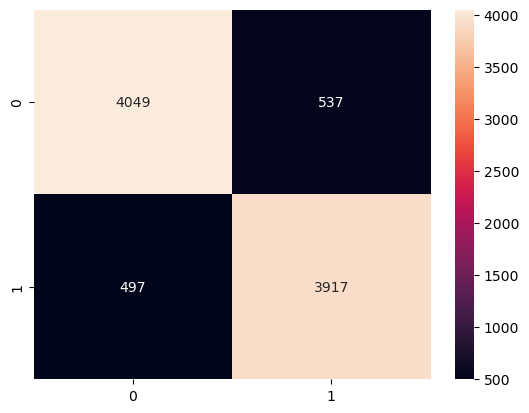

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.62      0.74      0.67      4586
    Negative       0.66      0.52      0.58      4414

    accuracy                           0.63      9000
   macro avg       0.64      0.63      0.63      9000
weighted avg       0.64      0.63      0.63      9000

Accuracy:
 0.6333333333333333
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


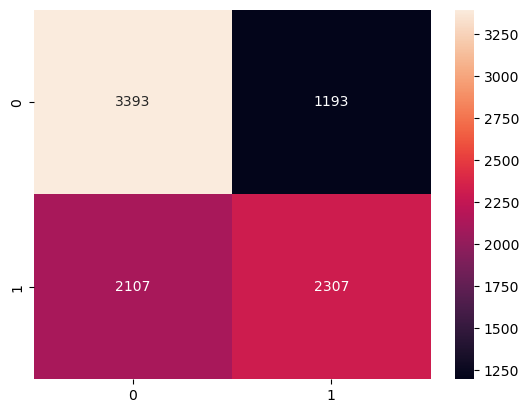

In [9]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

#### Lemmatication

In [10]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f2']
f.close()

In [11]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['Lemmatication'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,88205
1,'s,56973
2,film,45831
3,movie,34173
4,one,24606
5,n't,24093
6,see,19784
7,make,18946
8,like,18085
9,time,15012


In [12]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['Lemmatication'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,93660
1,'s,53320
2,movie,45067
3,film,40568
4,n't,35960
5,one,23601
6,make,22503
7,like,21809
8,see,17695
9,get,17508


In [13]:
def preprocess_text(text):
    text = [i for i in text if (i !='br')&(i !='film')&(i !='movie')]
    sent = ' '.join(text)
    return sent 
df['Lemmatication'] = df['Lemmatication'].apply(preprocess_text)
display (df)

,Lemmatication,comment,sentiment
0,oh god n't get worse always love silly little ...,"Oh my god, it just doesn't get any worse than ...",0
1,'re layman interest quantum theory string theo...,If you're a layman interested in quantum theor...,0
2,'s amaze talent actor chapa get well know star...,It's amazing that this no talent actor Chapa g...,0
3,must one overrate spanish history lack subtlet...,This must be one of the most overrated Spanish...,0
4,critics compare chop shop theatrical release c...,Some critics have compared Chop Shop with the ...,1
...,...,...,...
44995,appreciate movies like smart well craft entert...,I appreciate movies like this: smart and well-...,1
44996,'s rare sit front tv specifically watch partic...,It's rare that I sit down in front of the TV s...,1
44997,bore one night red eye think red eye one best ...,I was bored one night and Red Eye was on and t...,1
44998,three seriously dumb shipwreck masquerade psyc...,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [14]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['Lemmatication'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      4586
    Negative       0.88      0.88      0.88      4414

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000

Accuracy:
 0.8813333333333333
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


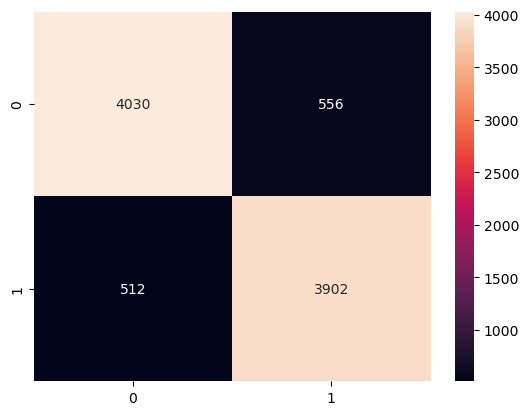

In [15]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.65      0.71      0.68      4586
    Negative       0.66      0.60      0.63      4414

    accuracy                           0.66      9000
   macro avg       0.66      0.66      0.66      9000
weighted avg       0.66      0.66      0.66      9000

Accuracy:
 0.6566666666666666
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


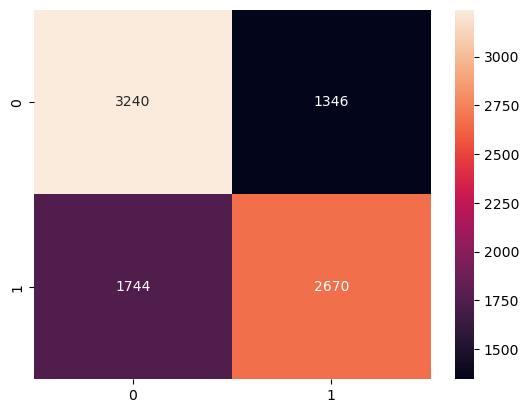

In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

#### stemming

In [17]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f3']
f.close()

In [18]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['stemming'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(30))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,88205
1,'s,56973
2,film,45833
3,movi,40432
4,one,25488
5,n't,24093
6,like,18483
7,time,15047
8,good,13747
9,see,13681


In [19]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['stemming'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(30))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,br,93660
1,'s,53320
2,movi,52533
3,film,40568
4,n't,35960
5,one,24390
6,like,22211
7,make,14610
8,even,13979
9,would,13840


In [20]:
def preprocess_text(text):
    text = [i for i in text if (i !='br')&(i !='film')&(i !='movi')]
    sent = ' '.join(text)
    return sent 
df['stemming'] = df['stemming'].apply(preprocess_text)
display (df)

,stemming,comment,sentiment
0,oh god n't get wors alway love silli littl sci...,"Oh my god, it just doesn't get any worse than ...",0
1,'re layman interest quantum theori string theo...,If you're a layman interested in quantum theor...,0
2,'s amaz talent actor chapa got well known star...,It's amazing that this no talent actor Chapa g...,0
3,must one overr spanish histori lack subtleti c...,This must be one of the most overrated Spanish...,0
4,critic compar chop shop theatric releas citi g...,Some critics have compared Chop Shop with the ...,1
...,...,...,...
44995,appreci like smart well craft entertain absorb...,I appreciate movies like this: smart and well-...,1
44996,'s rare sit front tv specif watch particular p...,It's rare that I sit down in front of the TV s...,1
44997,bore one night red eye thought red eye one bes...,I was bored one night and Red Eye was on and t...,1
44998,three serious dumb shipwreck masquerad psychol...,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [21]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['stemming'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      4586
    Negative       0.87      0.88      0.88      4414

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000

Accuracy:
 0.8807777777777778
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


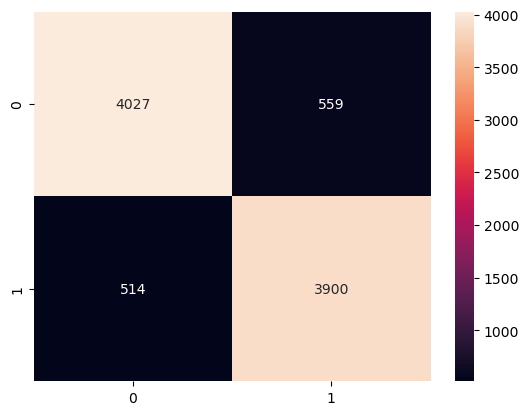

In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.66      0.68      0.67      4586
    Negative       0.66      0.64      0.65      4414

    accuracy                           0.66      9000
   macro avg       0.66      0.66      0.66      9000
weighted avg       0.66      0.66      0.66      9000

Accuracy:
 0.6598888888888889
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


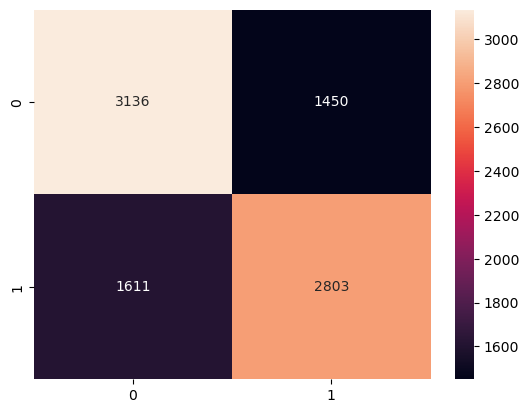

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

#### com_have_2_alphabetment

In [24]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f4']
f.close()

In [25]:
from collections import Counter
Positive_sent = df[df['sentiment']==1]
top = Counter([item for sublist in Positive_sent['com_have_2_alphabetment'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(30))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,film,45833
1,movi,40432
2,one,25488
3,n't,24093
4,like,18483
5,time,15047
6,good,13747
7,see,13681
8,charact,12711
9,stori,12698


In [26]:
from collections import Counter
Positive_sent = df[df['sentiment']==0]
top = Counter([item for sublist in Positive_sent['com_have_2_alphabetment'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(30))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,movi,52533
1,film,40568
2,n't,35960
3,one,24390
4,like,22211
5,make,14610
6,even,13979
7,would,13840
8,time,13799
9,get,13687


In [27]:
def preprocess_text(text):
    text = [i for i in text if (i !='movi')&(i !='film')&(i !='one')&(i !='make')&(i !='see')&(i !='time')&(i !='watch')]
    sent = ' '.join(text)
    return sent 
df['com_have_2_alphabetment'] = df['com_have_2_alphabetment'].apply(preprocess_text)
display (df)

,com_have_2_alphabetment,comment,sentiment
0,god n't get wors alway love silli littl sci st...,"Oh my god, it just doesn't get any worse than ...",0
1,'re layman interest quantum theori string theo...,If you're a layman interested in quantum theor...,0
2,amaz talent actor chapa got well known star ap...,It's amazing that this no talent actor Chapa g...,0
3,must overr spanish histori lack subtleti compl...,This must be one of the most overrated Spanish...,0
4,critic compar chop shop theatric releas citi g...,Some critics have compared Chop Shop with the ...,1
...,...,...,...
44995,appreci like smart well craft entertain absorb...,I appreciate movies like this: smart and well-...,1
44996,rare sit front specif particular programm even...,It's rare that I sit down in front of the TV s...,1
44997,bore night red eye thought red eye best long m...,I was bored one night and Red Eye was on and t...,1
44998,three serious dumb shipwreck masquerad psychol...,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [28]:
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['com_have_2_alphabetment'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.88      0.88      0.88      4586
    Negative       0.87      0.88      0.87      4414

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000

Accuracy:
 0.8768888888888889
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


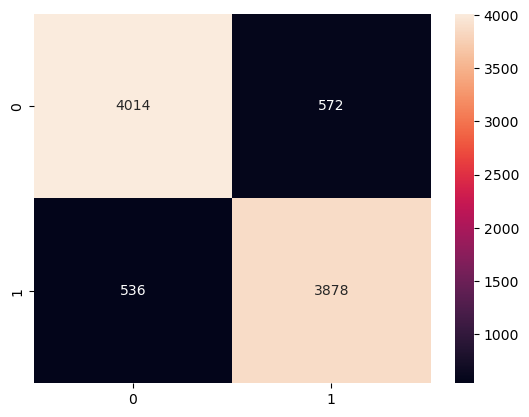

In [29]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.66      0.69      0.67      4586
    Negative       0.66      0.62      0.64      4414

    accuracy                           0.66      9000
   macro avg       0.66      0.66      0.66      9000
weighted avg       0.66      0.66      0.66      9000

Accuracy:
 0.6583333333333333
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


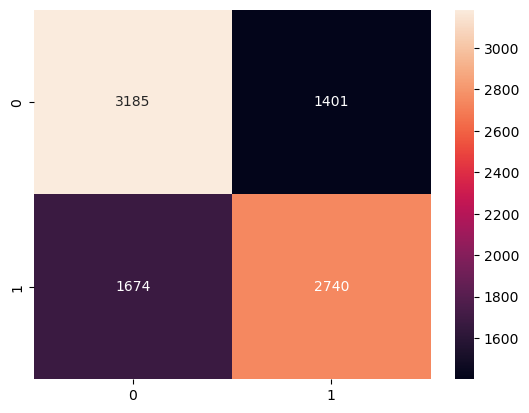

In [30]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

In [35]:
df['com_have_2_alphabetment'].loc[2]

'amaz talent actor chapa got well known star appear dismal pathet cheesi overlong low life gangster look white half mexican much act bad mani well known star trashi given script seem made year old sure career low point actor dunaway wagner keach tili busey sure embarrass ever appear turkey doubt mani peopl ever heard chapa terribl sure disappear oblivion belong'

### 3.2 Word2vec

In [36]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f4']
f.close()
def preprocess_text(text):
    text = [i for i in text if (i !='movi')&(i !='film')&(i !='one')&(i !='make')&(i !='see')&(i !='time')&(i !='watch')]
    sent = ' '.join(text)
    return sent 
df['com_have_2_alphabetment'] = df['com_have_2_alphabetment'].apply(preprocess_text)
display (df)

,com_have_2_alphabetment,comment,sentiment
0,god n't get wors alway love silli littl sci st...,"Oh my god, it just doesn't get any worse than ...",0
1,'re layman interest quantum theori string theo...,If you're a layman interested in quantum theor...,0
2,amaz talent actor chapa got well known star ap...,It's amazing that this no talent actor Chapa g...,0
3,must overr spanish histori lack subtleti compl...,This must be one of the most overrated Spanish...,0
4,critic compar chop shop theatric releas citi g...,Some critics have compared Chop Shop with the ...,1
...,...,...,...
44995,appreci like smart well craft entertain absorb...,I appreciate movies like this: smart and well-...,1
44996,rare sit front specif particular programm even...,It's rare that I sit down in front of the TV s...,1
44997,bore night red eye thought red eye best long m...,I was bored one night and Red Eye was on and t...,1
44998,three serious dumb shipwreck masquerad psychol...,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [37]:
from gensim.models import Word2Vec
sentences = df['com_have_2_alphabetment'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv]
    if not doc:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

df['vector'] = df['com_have_2_alphabetment'].apply(lambda doc: document_vector(word2vec_model, doc))
X = np.array(list(df['vector']))
y = df['sentiment'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.65      0.63      0.64      4586
    Negative       0.62      0.65      0.64      4414

    accuracy                           0.64      9000
   macro avg       0.64      0.64      0.64      9000
weighted avg       0.64      0.64      0.64      9000

Accuracy:
 0.6357777777777778
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


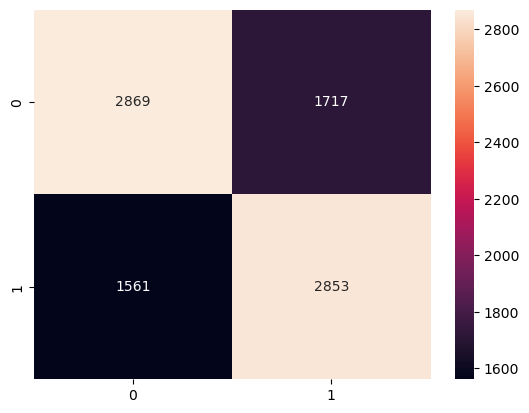

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
analysis(y_test, y_pred)

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.57      0.59      0.58      4586
    Negative       0.56      0.54      0.55      4414

    accuracy                           0.57      9000
   macro avg       0.56      0.56      0.56      9000
weighted avg       0.57      0.57      0.56      9000

Accuracy:
 0.5652222222222222
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


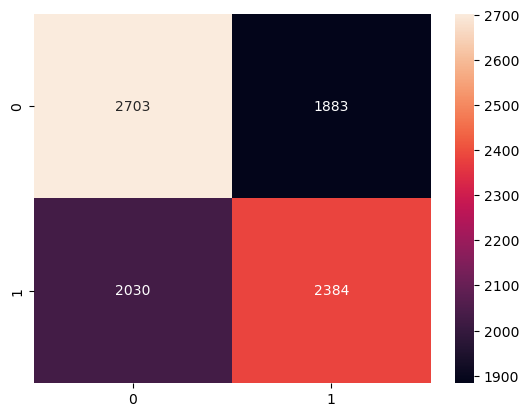

In [40]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
analysis(y_test, y_pred)

### 3.2 params

#### best LR params

In [4]:
df = pd.read_csv(r'dataset.csv')
df['sentiment'] = df['sentiment'].replace('negative',0)
df['sentiment'] = df['sentiment'].replace('positive',1)
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    text = re.sub("[^a-zA-Z']", ' ', text) 
    text = re.sub("\s+", " ", text).strip()
    text = str(text).lower()
    token = word_tokenize(text)
    token = ' '.join(token)
    return token 
df['comment'] = df['comment'].apply(preprocess_text)
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['comment'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


Best Parameters:
 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      4586
    Negative       0.89      0.89      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8938888888888888
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


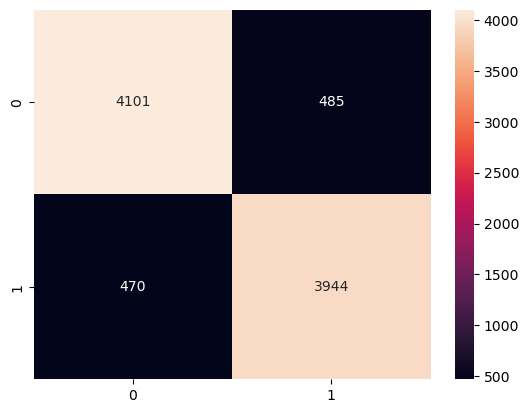

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']  
}

logistic = LogisticRegression()

clf = GridSearchCV(logistic, param_grid, cv=5, verbose=0, n_jobs=-1)

clf.fit(X_train, y_train)
print("Best Parameters:\n", clf.best_params_)
y_pred = clf.predict(X_test)

analysis(y_test, y_pred)
import pickle
pickle.dump(clf, open(r'LR.pkl', 'wb'))

#### best K for KNN

In [6]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f2']
f.close()
def preprocess_text(text):
    text = [i for i in text if (i !='movi')&(i !='film')&(i !='one')&(i !='make')&(i !='see')&(i !='time')&(i !='watch')]
    sent = ' '.join(text)
    return sent 
df['Lemmatication'] = df['Lemmatication'].apply(preprocess_text)
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['Lemmatication'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Best Parameters:
 {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.60      0.80      0.69      4586
    Negative       0.68      0.45      0.54      4414

    accuracy                           0.63      9000
   macro avg       0.64      0.62      0.61      9000
weighted avg       0.64      0.63      0.62      9000

Accuracy:
 0.6277777777777778
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


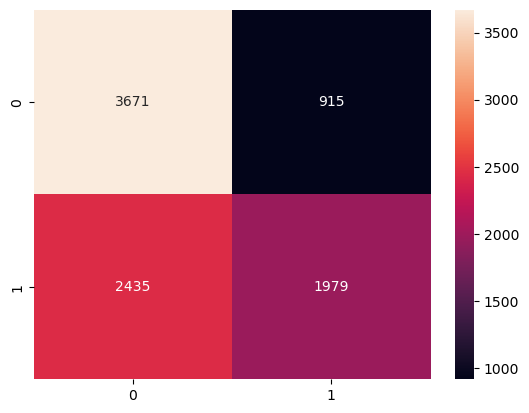

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}
knn = KNeighborsClassifier()
klf = GridSearchCV(knn, param_grid, cv=5, verbose=0, n_jobs=-1)
klf.fit(X_train, y_train)
print("Best Parameters:\n", klf.best_params_)
y_pred = klf.predict(X_test)
analysis(y_test, y_pred)
import pickle
pickle.dump(klf, open(r'KNN.pkl', 'wb'))

## MLP

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Classifacion Report: 
               precision    recall  f1-score   support

    Positive       0.88      0.91      0.90      4586
    Negative       0.91      0.87      0.89      4414

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy:
 0.8935555555555555
Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


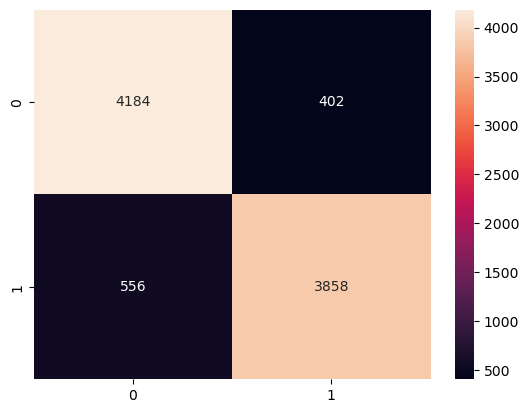

In [14]:
import shelve

df = pd.DataFrame()
f = shelve.open('features.db')
df = f['f4']
f.close()
def preprocess_text(text):
    text = [i for i in text if (i !='movi')&(i !='film')&(i !='one')&(i !='make')&(i !='see')&(i !='time')&(i !='watch')]
    sent = ' '.join(text)
    return sent 
df['com_have_2_alphabetment'] = df['com_have_2_alphabetment'].apply(preprocess_text)
vectorizer = CountVectorizer()    #https://spotintelligence.com/2022/12/20/bag-of-words-python/    We'll use CountVectorizer from scikit-learn to implement the bag of words method.
X = vectorizer.fit_transform(df['com_have_2_alphabetment'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), 
                    max_iter=2000,  
                    activation='relu', 
                    solver='adam', 
                    alpha=0.01,
                    learning_rate='adaptive', 
                    learning_rate_init=0.0001, 
                    shuffle=True,  
                    random_state=30,  
                    early_stopping=True,
                    validation_fraction=0.1, 
                    n_iter_no_change=10) 

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
analysis(y_test, y_pred)

In [15]:
import pickle
pickle.dump(mlp, open(r'mlp.pkl', 'wb'))